<a href="https://colab.research.google.com/github/Prashikta/LinearRegression-Predict_Percentage/blob/main/GRIP21_July_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple linear regression task** : *Prediction using Supervised ML*

### **Problem Statement:**
Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

### Author: Prashikta Gupta

#### Import libraries

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading dataset

In [2]:
#Reading dataset from the link
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.shape

(25, 2)

In [4]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Plotting the Graph

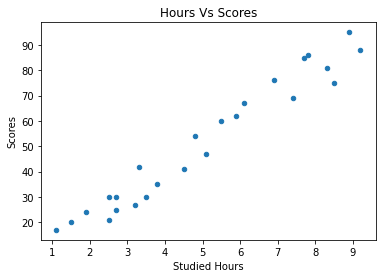

In [7]:
#Checking the relationship between data
data.plot(x="Hours", y="Scores", kind="scatter")
plt.title("Hours Vs Scores")
plt.xlabel("Studied Hours")
plt.ylabel("Scores")
plt.show()

###### From above graph, It is concluded that if a student studied hours is more then he/she will achieve good scores.
###### So it is cleared that there is a positive linear relationship between Studied Hours and Scores. 

#### Preparing the data

Divide the data into independent(input) and dependent(output) variable.

In [8]:
x = data.iloc[:, :-1]
y = data.iloc[:, 1]

Now split the data into train and test sets using Scikit-Learn built-in function train_test_split().

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Model Building

In [10]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
print("Model trained successfully!")

Model trained successfully!


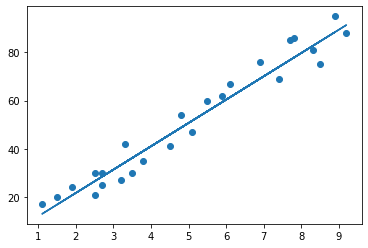

In [11]:
# Plotting the regression line
reg_line = LR.coef_*x+LR.intercept_

#Plotting for test data
plt.scatter(x, y)
plt.plot(x, reg_line)
plt.show()

This graph tell us how close these data points are to the fitted regression line.

In [12]:
#Predicting the Scores
pred = LR.predict(x_test)
print(x_test)

    Hours
17    1.9
13    3.3
15    8.9
7     5.5
2     3.2


In [13]:
#Compare the actual scores with predicted scores
val = {"Actual": y_test, "Predicted":pred}
df = pd.DataFrame(val)
df

,Actual,Predicted
17,24,20.754941
13,42,34.296982
15,95,88.465147
7,60,55.577332
2,27,33.329693


#### Evaluating the model or checking the performance of model
Final step:

In [14]:
# R Square value * 100 
round(LR.score(x_train,y_train)*100)

95

In [15]:
#Mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 5.647058242639954


**Question: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [16]:
hours = [[9.25]]

question_pred = LR.predict(hours)
print("Hours: {}".format(hours[0][0]))
print("Predicted score: {}".format(question_pred[0]))

Hours: 9.25
Predicted score: 91.85065731273272
